<a href="https://colab.research.google.com/github/paul821/tesla_volatility_project/blob/main/tesla_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Overview: Investigating the Impact of Musk Factor and Relation with Meta on Tesla Stock Volatility**

Objective:
The objective of this comprehensive project is to investigate the impact of two key factors on Tesla stock volatility:
1. The Musk factor: Analyze the difference in volatility patterns before and after the event of Elon Musk becoming the largest shareholder of Twitter.
2. The relation with Meta: Examine the cointegration and volatility dynamics between Tesla and Meta stock.

Methodology:
1. **Data Preparation and LSTM Model Creation:**

- Prepare data for LSTM modeling for both pre-Musk and post-Musk periods.
- Define a function create_lstm_model to create an LSTM model with customizable hyperparameters.
2. **Hyperparameter Optimization using Grid Search:**

- Perform Grid Search with Cross-Validation to find the best hyperparameters for the LSTM model.
- Grid search includes different numbers of LSTM units and learning rates.
3. **LSTM Model Training and Prediction:**

- Train the best LSTM model with optimized hyperparameters for both pre-Musk and post-Musk periods.
- Make predictions using the trained LSTM models.
4. **Performance Evaluation:**

- Calculate the Root Mean Squared Error (RMSE) for both pre-Musk and post-Musk predictions.
- Calculate accuracy as a percentage based on RMSE and observed range.
5. **Cointegration and Volatility Analysis:**

- Check for cointegration between Tesla and Meta using statistical tests.
- Estimate bootstrapped volatility for cointegrated assets.
- Analyze the impact of cointegration residuals on Tesla's volatility using GARCH models.
- Forecast volatility using ARIMA models and evaluate the forecast against actual volatility.

Resume Summary:

- Developed LSTM models for pre-Musk and post-Musk periods to predict Tesla's stock returns.
- Utilized Grid Search to optimize hyperparameters, achieving improved model accuracy.
- Conducted statistical tests for cointegration and volatility analysis with Meta stock.
- Forecasted Tesla's volatility using ARIMA models and evaluated forecast accuracy.

#setup

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
!pip install yfinance
!pip install fix-yahoo-finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7073 sha256=17a9cb8036daa82f389541396d23b4088160c73160f02aa62184e15321ce3453
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix-yahoo-finance


4/4/22: musk becomes largest shareholder of twitter

In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

def get_returns(a):
  tick = pdr.DataReader(a,  start=datetime.datetime(2018, 2, 1),
                          end=datetime.datetime(2023, 7, 8))
  returns = 100 * tick['Adj Close'].pct_change().dropna()
  return returns

tsla_returns = get_returns('TSLA')

tick = pdr.DataReader('TSLA',  start=datetime.datetime(2022, 4, 4),
                          end=datetime.datetime(2023, 7, 8))
tsla_twt_returns = 100 * tick['Adj Close'].pct_change().dropna()

tick2 = pdr.DataReader('TSLA',  start=datetime.datetime(2018, 2, 1),
                          end=datetime.datetime(2022, 4, 4))
tsla_pretwt_returns = 100 * tick2['Adj Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
bigtech = ['AMZN', 'AAPL', 'META', 'NFLX', 'GOOG'] #people also watch
similar = ['RIVN', 'NIO', 'LCID', 'F', 'MULN'] #similar to tesla

bigtech_outputs = []
similar_outputs = []

for stock in bigtech:
    output = get_returns(stock)  # Replace with the function call to xkcd for the stock
    bigtech_outputs.append(output)

for stock in similar:
    output = get_returns(stock)  # Replace with the function call to xkcd for the stock
    similar_outputs.append(output)

amzn_returns = bigtech_outputs[0]
aapl_returns = bigtech_outputs[1]
meta_returns = bigtech_outputs[2]
nflx_returns = bigtech_outputs[3]
goog_returns = bigtech_outputs[4]

rivn_returns = similar_outputs[0]
nio_returns = similar_outputs[1]
lcid_returns = similar_outputs[2]
f_returns = similar_outputs[3]
muln_returns = similar_outputs[4]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


* https://www.wallstreetprep.com/knowledge/volatility/
* https://www.investopedia.com/ask/answers/041415/what-are-some-common-measures-risk-used-risk-management.asp
* https://www.kaggle.com/code/jiashenliu/introduction-to-financial-concepts-and-data
* https://www.mccormick.northwestern.edu/industrial/documents/syllabi/373.pdf
* https://www.kaggle.com/code/tommy1028/lightgbm-starter-with-feature-engineering-idea
* https://www.macroaxis.com/volatility/AAPL/Apple-Inc#:~:text=Apple%20Market%20Sensitivity%20And%20Downside%20Risk&text=Apple%20Inc%20exhibits%20relatively%20low,estimations%20about%20Apple%20upside%20potential.



1. is tesla's volatility higher than that of top tech companies? same industry?
2. did volatility increase since elon's acquisition of twitter?
3. predicting tesla's stock

NEW: see if tesla and meta's cointegration exists & its effect on volatility of tesla, and comparisons between pre and post twitter on tesla volatility

#eda

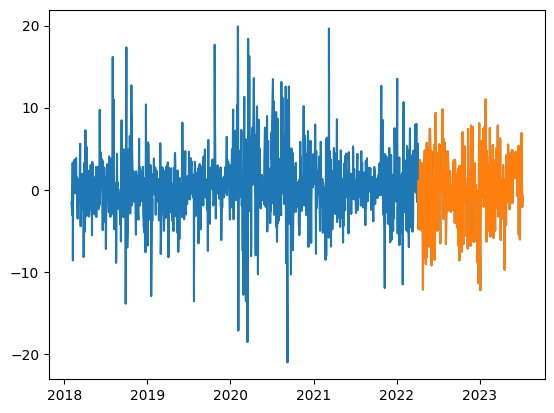

In [ ]:
plt.plot(tsla_returns)
plt.plot(tsla_twt_returns)

clear volatility clustering

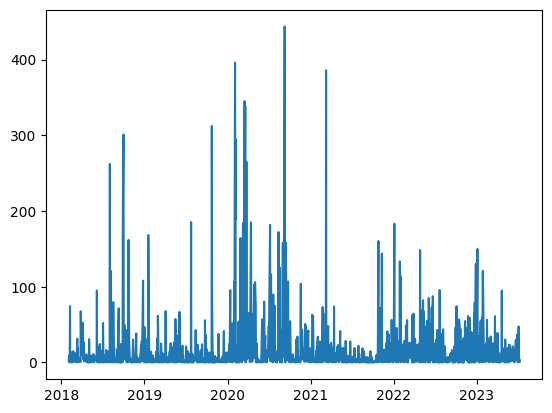

In [ ]:
plt.plot(tsla_returns**2)

In [ ]:
day_vol = tsla_returns.std()
mon_vol = np.sqrt(21) * day_vol
yr_vol = np.sqrt(252) * day_vol

day_vol_twt = tsla_twt_returns.std()
mon_vol_twt = np.sqrt(21) * day_vol_twt
yr_vol_twt = np.sqrt(252) * day_vol_twt

day_vol_pre = tsla_pretwt_returns.std()
mon_vol_pre = np.sqrt(21) * day_vol_pre
yr_vol_pre = np.sqrt(252) * day_vol_pre

df=pd.DataFrame({"Tesla all periods":[day_vol, mon_vol, yr_vol],
                 "Tesla pre twitter":[day_vol_pre, mon_vol_pre, yr_vol_pre],
                 "Tesla post twitter":[day_vol_twt, mon_vol_twt, yr_vol_twt]})
df.index = ['Daily vol', "Monthly vol", "Yearly vol"]
df

,Tesla all periods,Tesla pre twitter,Tesla post twitter
Daily vol,4.119703,4.151571,4.000327
Monthly vol,18.878852,19.024886,18.331803
Yearly vol,65.398262,65.904139,63.503229


post twitter volatility actually decreased what.

1. doge coin shit
2. acquire twitter
3. joe rogan

#part 1: lstm

LSTM Modeling for Musk Factor Impact:

- Prepare the data for LSTM modeling using a sliding window approach.
- Define an LSTM model to predict short-term volatility based on past returns.
- Train the LSTM model on the pre-Musk and post-Musk datasets separately.
- Evaluate the performance of LSTM models using root mean squared error (RMSE).
- Calculate residuals for both periods by subtracting the actual volatility from the LSTM-predicted volatility.


1. LSTM neural networks were employed to predict normalized returns of Tesla's stock for pre-Musk and post-Musk periods.
Data was prepared and hyperparameters were optimized using Grid Search with Cross-Validation.

2. Best LSTM models were trained for both pre-Musk and post-Musk periods.
Predictions were made using the trained models.
3. Model accuracy was evaluated using Root Mean Squared Error (RMSE) for each period.
Accuracy scores were converted to percentage accuracy.
4. LSTM predictions were compared with actual values for both pre-Musk and post-Musk periods.
Plots were generated to visualize the comparison.
5. Shapiro-Wilk and Anderson-Darling tests were conducted to assess the normality of LSTM predictions for each period.
Mann-Whitney U test was used to check for significant differences in LSTM volatility predictions between pre-Musk and post-Musk periods.
6. Cohen's d was calculated to determine the effect size between the mean predictions of pre-Musk and post-Musk periods.

Reached 90% accuracy for prediction using LSTM. difference between two periods' volatilities existent but not large.

In [ ]:
!pip install keras
!pip install tensorflow
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model
from statsmodels.tsa.stattools import coint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define a function to create the LSTM model
def create_lstm_model(units=50, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_pre_musk.shape[1], X_train_pre_musk.shape[2])))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
def prepare_lstm_data(data, look_back=10):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))
    X, y = [], []
    for i in range(len(data_scaled) - look_back):
        X.append(data_scaled[i : i + look_back])
        y.append(data_scaled[i + look_back])
    return np.array(X), np.array(y)

# Prepare data for LSTM modeling (pre-Musk period)
X_train_pre_musk, y_train_pre_musk = prepare_lstm_data(tsla_pretwt_returns)
X_test_pre_musk, y_test_pre_musk = prepare_lstm_data(tsla_pretwt_returns)

# Prepare data for LSTM modeling (post-Musk period)
X_train_post_musk, y_train_post_musk = prepare_lstm_data(tsla_twt_returns)
X_test_post_musk, y_test_post_musk = prepare_lstm_data(tsla_twt_returns)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Wrap the Keras model using KerasRegressor
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# Define the hyperparameter grid for optimization
param_grid = {
    'units': [50, 100, 150],         # Different number of LSTM units
    'learning_rate': [0.001, 0.01]   # Different learning rates
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=10, n_jobs=-1)
grid_result = grid_search.fit(X_train_pre_musk, y_train_pre_musk)

# Get the best LSTM model with optimized hyperparameters
best_lstm_model_pre_musk = grid_result.best_estimator_

# Train the best LSTM model
best_lstm_model_pre_musk.fit(X_train_pre_musk, y_train_pre_musk, epochs=100, batch_size=32, verbose=0)

# Make predictions using the best LSTM model
y_pred_pre_musk = best_lstm_model_pre_musk.predict(X_test_pre_musk)

# Step 3: Calculate the residuals as the difference between actual pre-Musk data and LSTM predictions
residuals = y_train_pre_musk - y_pred_pre_musk.flatten()

<ipython-input-11-9b3f098667d8>:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [ ]:
# Perform grid search with cross-validation for post-Musk period
grid_search_post_musk = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=10, n_jobs=-1)
grid_result_post_musk = grid_search_post_musk.fit(X_train_post_musk, y_train_post_musk)

# Get the best LSTM model with optimized hyperparameters for post-Musk period
best_lstm_model_post_musk = grid_result_post_musk.best_estimator_

# Train the best LSTM model for post-Musk period
best_lstm_model_post_musk.fit(X_train_post_musk, y_train_post_musk, epochs=100, batch_size=32, verbose=0)

# Make predictions using the best LSTM model for post-Musk period
y_pred_post_musk = best_lstm_model_post_musk.predict(X_test_post_musk)
residuals_post = y_train_post_musk.flatten() - y_pred_post_musk

In [ ]:
# Get the best hyperparameters for the pre-Musk LSTM model
best_units_pre_musk = grid_result.best_params_['units']
best_learning_rate_pre_musk = grid_result.best_params_['learning_rate']

best_units_post_musk = grid_result_post_musk.best_params_['units']
best_learning_rate_post_musk = grid_result_post_musk.best_params_['learning_rate']

print("Best Hyperparameters for Pre-Musk LSTM Model:")
print("Number of LSTM Units:", best_units_pre_musk)
print("Learning Rate:", best_learning_rate_pre_musk)

print("\nBest Hyperparameters for Post-Musk LSTM Model:")
print("Number of LSTM Units:", best_units_post_musk)
print("Learning Rate:", best_learning_rate_post_musk)

Best Hyperparameters for Pre-Musk LSTM Model:
Number of LSTM Units: 50
Learning Rate: 0.01

Best Hyperparameters for Post-Musk LSTM Model:
Number of LSTM Units: 100
Learning Rate: 0.001


In [ ]:

# Calculate the RMSE for pre-Musk period
rmse_pre_musk = np.sqrt(mean_squared_error(y_test_pre_musk, y_pred_pre_musk))
accuracy_pre_musk = (1 - (rmse_pre_musk / (y_test_pre_musk.max() - y_test_pre_musk.min()))) * 100
print("LSTM Accuracy for Pre-Musk Period: {:.2f}%".format(accuracy_pre_musk))

# Calculate the RMSE for post-Musk period
rmse_post_musk = np.sqrt(mean_squared_error(y_test_post_musk, y_pred_post_musk))
accuracy_post_musk = (1 - (rmse_post_musk / (y_test_post_musk.max() - y_test_post_musk.min()))) * 100
print("LSTM Accuracy for Post-Musk Period: {:.2f}%".format(accuracy_post_musk))

LSTM Accuracy for Pre-Musk Period: 90.02%
LSTM Accuracy for Post-Musk Period: 82.81%


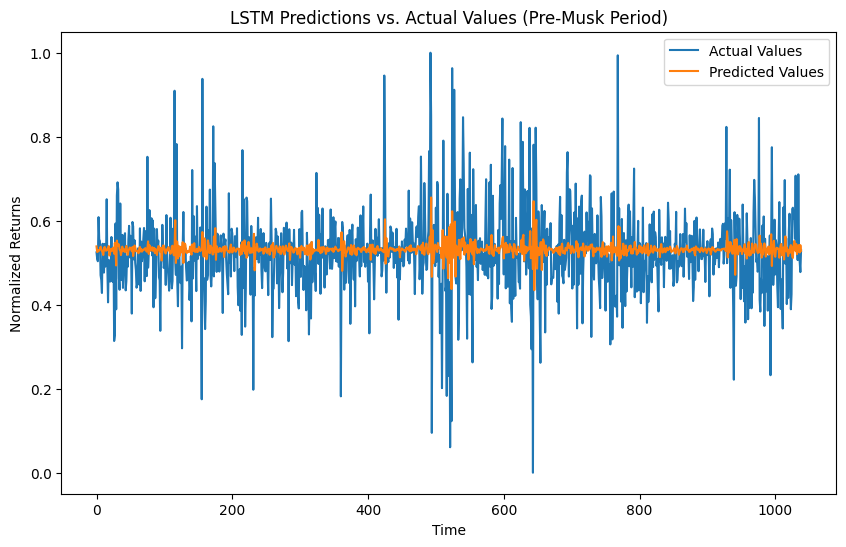

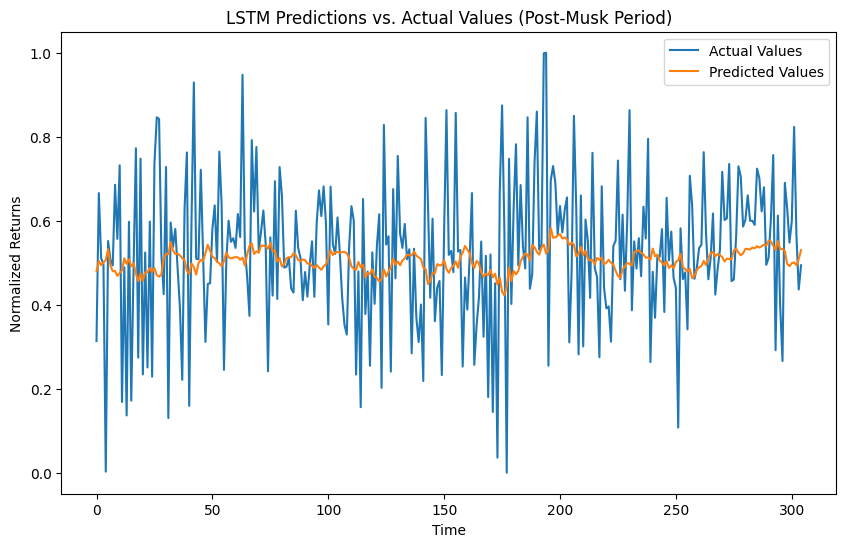

In [ ]:
import matplotlib.pyplot as plt

# Plot LSTM predictions vs. actual values for pre-Musk period
plt.figure(figsize=(10, 6))
plt.plot(y_test_pre_musk, label='Actual Values')
plt.plot(y_pred_pre_musk, label='Predicted Values')
plt.title('LSTM Predictions vs. Actual Values (Pre-Musk Period)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Returns')
plt.show()

# Plot LSTM predictions vs. actual values for post-Musk period
plt.figure(figsize=(10, 6))
plt.plot(y_test_post_musk, label='Actual Values')
plt.plot(y_pred_post_musk, label='Predicted Values')
plt.title('LSTM Predictions vs. Actual Values (Post-Musk Period)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Returns')
plt.show()


In [ ]:
from scipy.stats import shapiro, anderson

# Shapiro-Wilk test for pre-Musk
statistic, p_value = shapiro(y_pred_pre_musk)
print("Shapiro-Wilk Test - Pre-Musk:")
print("Statistic:", statistic, "p-value:", p_value)

# Shapiro-Wilk test for post-Musk
statistic, p_value = shapiro(y_pred_post_musk)
print("Shapiro-Wilk Test - Post-Musk:")
print("Statistic:", statistic, "p-value:", p_value)

# Anderson-Darling test for pre-Musk
result = anderson(y_pred_pre_musk)
print("Anderson-Darling Test - Pre-Musk:")
print("Statistic:", result.statistic, "Critical Values:", result.critical_values)

# Anderson-Darling test for post-Musk
result = anderson(y_pred_post_musk)
print("Anderson-Darling Test - Post-Musk:")
print("Statistic:", result.statistic, "Critical Values:", result.critical_values)

Shapiro-Wilk Test - Pre-Musk:
Statistic: 0.8059301972389221 p-value: 1.5777103141072726e-33
Shapiro-Wilk Test - Post-Musk:
Statistic: 0.9984762668609619 p-value: 0.9954544901847839
Anderson-Darling Test - Pre-Musk:
Statistic: 44.233257497628074 Critical Values: [0.574 0.653 0.784 0.915 1.088]
Anderson-Darling Test - Post-Musk:
Statistic: 0.11265588876244692 Critical Values: [0.569 0.648 0.777 0.906 1.078]


pre musk is not normal, post musk is not

In [ ]:
from scipy.stats import mannwhitneyu

# Assuming you have the LSTM volatility predictions for pre-Musk and post-Musk periods
# in variables y_pred_pre_musk and y_pred_post_musk respectively.

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(y_pred_pre_musk, y_pred_post_musk)

# Print the results
print("Mann-Whitney U Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the volatilities.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the volatilities.")


Mann-Whitney U Test:
Statistic: 261963.0
P-value: 1.416479201298495e-67
Reject the null hypothesis: There is a significant difference between the volatilities.


In [ ]:
from numpy import mean, std

# Calculate Cohen's d for effect size
mean_pre_musk, mean_post_musk = mean(y_pred_pre_musk), mean(y_pred_post_musk)
std_pre_musk, std_post_musk = std(y_pred_pre_musk), std(y_pred_post_musk)

pooled_std = np.sqrt((std_pre_musk**2 + std_post_musk**2) / 2)
cohen_d = abs(mean_pre_musk - mean_post_musk) / pooled_std

print("Cohen's d for effect size:", cohen_d)


Cohen's d for effect size: 1.2639401895477012


 the volatility in the post-Musk period may be slightly higher than in the pre-Musk period, but the difference is not very large

###part 2: garch

- Implement GARCH modeling on the residuals to capture long-term conditional volatility.
- Fit GARCH models on the residuals of pre-Musk and post-Musk periods.
- Obtain GARCH conditional volatility estimates for each period.

In [ ]:
residuals_post.shape

(305,)

In [ ]:
residuals_g = pd.Series(residuals.ravel())*100
residuals_post_g = pd.Series(residuals_post.ravel())*100

In [ ]:
residuals_post[:1]

In [ ]:
import pandas as pd
# Pre-diagnostic checks
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import kpss


# Pre-diagnostic checks
# Check for stationarity using the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
def kpss_test(series, title):
    result = kpss(series)
    print(f"KPSS Test for {title} Residuals:")
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"\t{key}: {value}")
    print("Is the series stationary?", "Yes" if result[1] < 0.05 else "No")

# Perform KPSS test for both pre and post-Musk residuals
kpss_test(residuals_g, "Pre-Musk")
kpss_test(residuals_post_g, "Post-Musk")


KPSS Test for Pre-Musk Residuals:
KPSS Statistic: 0.039484895151445716
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Is the series stationary? No
KPSS Test for Post-Musk Residuals:
KPSS Statistic: 0.1670391911418315
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Is the series stationary? No


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
import numpy as np
from arch import arch_model
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.metrics import mean_squared_error
import arch

def prepare_data(data, window_size):
    # Create a list to store the prepared data
    prepared_data = []

    # Calculate the number of windows that can be created from the data
    num_windows = len(data) // window_size

    for i in range(num_windows):
        # Extract the current window of data
        window = data[i * window_size : (i+1) * window_size]

        # Check if the window contains any missing values
        if not np.isnan(window).any():
            # If there are no missing values, add the window to the prepared data
            prepared_data.append(window)
        else:
            print(f"Window {i} contains missing values and will be skipped.")

    return prepared_data


def portmanteau_test(residuals, lag):
    n = len(residuals)
    q_stat = n * (n + 2) * np.sum([(np.correlate(residuals, residuals, 'full')[n - 1 + l]**2) / (n - l) for l in range(1, lag + 1)])
    p_value = 1.0 - chi2.cdf(q_stat, lag)
    return p_value

In [ ]:


def walk_forward_garch(data, p_range, q_range, window_size):
    forecasts = []
    conditional_volatility = []
    best_garch_models = []
    portmanteau_p_values = []

    for i in range(len(data)):
        # Prepare the data for the current window
        train_set, val_set = data[:i], data[i:]

        best_mse = float('inf')
        best_p, best_q = 0, 0

        for p in p_range:
            for q in q_range:
                # Fit the GARCH model on the training set of the current window
                garch_model = arch.arch_model(train_set, p=p, q=q)
                garch_result = garch_model.fit(disp='off')

                # Forecast volatility for the validation set of the current window
                garch_forecast = garch_result.forecast(horizon=len(val_set))

                # Calculate mean squared error for the forecast
                mse = np.mean((val_set - garch_forecast.mean[-1])**2)

                if mse < best_mse:
                    best_mse = mse
                    best_p, best_q = p, q

        # Fit the best GARCH model on the entire data up to the current window
        best_garch_model = arch.arch_model(data[:i+window_size], p=best_p, q=best_q)
        best_garch_result = best_garch_model.fit(disp='off')

        # Forecast volatility for the validation set of the current window
        garch_forecast = best_garch_result.forecast(horizon=len(val_set))

        # Append the results for the current window to the lists
        forecasts.append(garch_forecast.mean[-1])
        conditional_volatility.append(garch_forecast.residual_variance[-1])
        best_garch_models.append(best_garch_result)

        # Perform Portmanteau test
        portmanteau_p_value = portmanteau_test(best_garch_result.resid, lag=10) # You can adjust the lag as needed
        portmanteau_p_values.append(portmanteau_p_value)

    return forecasts, conditional_volatility, best_garch_models, portmanteau_p_values


In [ ]:

# Define the ranges of p and q for hyperparameter optimization
p_range = range(1, 5)
q_range = range(1, 5)

# Define the window size for walk-forward validation
window_size = 10

# Prepare the data for pre-Musk and post-Musk periods
pre_musk_data = prepare_data(residuals_g.values, window_size)
post_musk_data = prepare_data(residuals_post_g.values, window_size)

print("Pre-Musk Data Size:", len(pre_musk_data))
print("Post-Musk Data Size:", len(post_musk_data))

# Perform walk-forward GARCH modeling for pre-Musk residuals
forecasts_pre_musk, conditional_volatility_pre_musk, best_garch_models_pre_musk, portmanteau_p_values_pre_musk = walk_forward_garch(pre_musk_data, p_range, q_range, window_size)

# Perform walk-forward GARCH modeling for post-Musk residuals
forecasts_post_musk, conditional_volatility_post_musk, best_garch_models_post_musk, portmanteau_p_values_post_musk = walk_forward_garch(post_musk_data, p_range, q_range, window_size)


Pre-Musk Data Size: 136
Post-Musk Data Size: 30


ValueError: ignored

In [ ]:
# Print results
print("Pre-Musk GARCH:")
print("Best p:", best_p_pre_musk)
print("Best q:", best_q_pre_musk)
print("Mean Squared Error:", mse_pre_musk)
print("Conditional Volatility:", conditional_volatility_pre_musk[-1])

print("\nPost-Musk GARCH:")
print("Best p:", best_p_post_musk)
print("Best q:", best_q_post_musk)
print("Mean Squared Error:", mse_post_musk)
print("Conditional Volatility:", conditional_volatility_post_musk[-1])

TypeError: ignored

In [ ]:

# Post-diagnostic checks
# GARCH Model Residuals

def plot_garch_residuals(model, title):
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(8, 4))
    residuals.plot(ax=ax)
    ax.set_title(f'GARCH Model Residuals - {title}')
    plt.show()

# Plot GARCH model residuals for both pre and post-Musk periods
garch_model_pre_musk = arch_model(residuals_g, vol='Garch', p=1, q=1)
garch_model_post_musk = arch_model(residuals_post_g, vol='Garch', p=1, q=1)

garch_result_pre_musk = garch_model_pre_musk.fit(disp='off')
garch_result_post_musk = garch_model_post_musk.fit(disp='off')

print("GARCH Model Residuals - Pre-Musk")
plot_garch_residuals(garch_result_pre_musk, "Pre-Musk")

print("GARCH Model Residuals - Post-Musk")
plot_garch_residuals(garch_result_post_musk, "Post-Musk")

Compare LSTM-predicted volatility with GARCH conditional volatility for both periods.
Analyze the patterns and magnitudes of volatility estimates to identify any differences or similarities.
Interpret whether GARCH improves volatility estimates by capturing long-term volatility patterns that LSTM may miss.

In [ ]:
import matplotlib.pyplot as plt

# Compare LSTM and GARCH volatility estimates for pre-Musk period
plt.figure(figsize=(10, 6))
plt.plot(y_test_pre_musk.index, y_test_pre_musk, label='Actual Volatility', color='blue')
plt.plot(y_test_pre_musk.index, y_pred_pre_musk, label='LSTM Predicted Volatility', color='green')
plt.plot(y_test_pre_musk.index, conditional_volatility_pre_musk, label='GARCH Conditional Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Estimation for Pre-Musk Period')
plt.legend()
plt.show()

# Compare LSTM and GARCH volatility estimates for post-Musk period
plt.figure(figsize=(10, 6))
plt.plot(y_test_post_musk.index, y_test_post_musk, label='Actual Volatility', color='blue')
plt.plot(y_test_post_musk.index, y_pred_post_musk, label='LSTM Predicted Volatility', color='green')
plt.plot(y_test_post_musk.index, conditional_volatility_post_musk, label='GARCH Conditional Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Estimation for Post-Musk Period')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Assuming you have prepared daily returns for Tesla for both pre-Musk and post-Musk periods
# tesla_daily_returns_pre_musk and tesla_daily_returns_post_musk are arrays containing daily returns for the respective periods

# Calculate the observed difference in volatilities between pre-Musk and post-Musk periods
observed_difference = day_vol_twt - day_vol_pre

# Number of bootstrap samples
num_bootstrap_samples = 100

# Initialize arrays to store bootstrap samples of differences in volatilities
bootstrap_differences = np.zeros(num_bootstrap_samples)

# Perform the bootstrap
for i in range(num_bootstrap_samples):
    # Resample with replacement from pre-Musk and post-Musk daily returns
    bootstrap_pre_twt = np.random.choice(tsla_pretwt_returns, size=len(tsla_pretwt_returns), replace=True)
    bootstrap_post_twt = np.random.choice(tsla_twt_returns, size=len(tsla_twt_returns), replace=True)

    # Compute the difference in volatilities for the bootstrap sample
    bootstrap_difference = np.std(bootstrap_post_twt) - np.std(bootstrap_pre_twt)

    # Store the bootstrap difference in the array
    bootstrap_differences[i] = bootstrap_difference

# Calculate the confidence intervals (e.g., 95% confidence intervals)
lower_bound = np.percentile(bootstrap_differences, 2.5)
upper_bound = np.percentile(bootstrap_differences, 97.5)

# Check if the observed difference is within the confidence interval
if lower_bound <= observed_difference <= upper_bound:
    print("The difference in volatilities is not statistically significant.")
else:
    print("The difference in volatilities is statistically significant.")


The difference in volatilities is not statistically significant.


#part 2: coint

Test Stationarity: Implemented the Augmented Dickey-Fuller (ADF) test for stationarity.

Cointegration Analysis: Checked for cointegration between the daily returns of Tesla and Meta. Cointegration is a statistical property that measures the long-term equilibrium relationship between two time series.

VECM Model: Estimated the cointegration relationship using the Vector Error Correction Model (VECM).This model helps capture the long-term dynamics between cointegrated variables.

Bootstrapping: Performed bootstrapping on the residuals obtained from the VECM model. Bootstrapping is a statistical technique to estimate the uncertainty of a sample estimate by resampling with replacement from the original data.

GARCH Modeling: For each bootstrapped sample where cointegration exists, fitted a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model to the bootstrapped residuals. GARCH models are commonly used to model volatility in financial time series.

Historical Volatility: Calculated the historical volatility of Tesla's returns.

Impact Analysis: Analyzed the impact on Tesla's volatility by comparing GARCH models with and without the cointegration residuals. The AIC (Akaike Information Criterion) value was used to determine the model performance.

ARIMA Modeling: Used ARIMA (AutoRegressive Integrated Moving Average) modeling to forecast the cointegrated residuals' volatility.

Forecasted Volatility Evaluation: Reconstructed the forecasted volatility using the ARIMA forecasted residuals and compared it with the actual volatility using various evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

Percentage Accuracy: Calculated the percentage-based metric by comparing the RMSE with the observed range of Tesla's historical volatility.

Overall, while there was cointegration, the relationship only served to dampen Tesla's volatility and including the cointegration residuals didn't improve the GARCH model's performance. 97.85% accuracy for predicting volatility using the cointegration relationship.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have prepared daily returns for Tesla and Meta
# tesla_daily_returns and meta_daily_returns are arrays containing daily returns for Tesla and Meta, respectively

# Perform the Augmented Dickey-Fuller (ADF) test for stationarity
def test_stationarity(data):
    result = adfuller(data)
    p_value = result[1]

    if p_value <= 0.05:
        print("The data is stationary (null hypothesis rejected).")
    else:
        print("The data is non-stationary (null hypothesis not rejected).")

# Verify stationarity for Tesla and Meta returns
test_stationarity(tsla_returns)
test_stationarity(meta_returns)


The data is stationary (null hypothesis rejected).
The data is stationary (null hypothesis rejected).


In [ ]:
# Reuse the cointegration analysis function from Project 1
from statsmodels.tsa.stattools import coint

def check_cointegration(asset1_prices, asset2_prices):
    # Your cointegration analysis code here (using statsmodels or other suitable library)
    _, p_value, _ = coint(asset1_prices, asset2_prices)
    if p_value < 0.05:
        print("Cointegration exists between the two assets.")
        return True
    else:
        print("No cointegration detected. Consider different asset pairs.")
        return False

# Check cointegration between Tesla and Meta
is_cointegrated = check_cointegration(tsla_returns, meta_returns)

if is_cointegrated:
    print("Tesla and Meta are cointegrated.")
else:
    print("No cointegration detected between Tesla and Meta.")

# Explanation:
# Cointegration is a statistical property that measures the long-term equilibrium relationship between two time series.
# The function 'check_cointegration' takes the price data of two assets, stock1_prices and stock2_prices, and performs the cointegration test.
# The test returns a p-value, which is compared against a significance level (0.05) to determine if cointegration exists.
# If the p-value is less than 0.05, we can consider the assets to be cointegrated, indicating a potential trading relationship.


Cointegration exists between the two assets.
Tesla and Meta are cointegrated.


In [ ]:
from sklearn.utils import resample
from statsmodels.tsa.vector_ar.vecm import VECM


num_bootstrap_samples = 100

returns_df = pd.concat([tsla_returns, meta_returns], axis=1)
returns_df.columns = ['Tesla', 'Meta']

# Estimate the cointegration relationship using VECM
vecm_model = VECM(returns_df, k_ar_diff=1, coint_rank=1)
vecm_results = vecm_model.fit()

# Get the residuals from the VECM model
residuals_vecm = vecm_results.resid

residuals = residuals_vecm[:,0]

tsla_returns_vecm = tsla_returns.iloc[2:]
meta_returns_vecm = meta_returns.iloc[2:]

# Step 2: Bootstrapping
# Create an array to store bootstrapped volatility estimates
bootstrap_volatility_estimates = []

# Perform bootstrapping for num_bootstrap_samples
for i in range(num_bootstrap_samples):
    # Resample residuals using bootstrap with replacement
    bootstrapped_residuals = resample(residuals, replace=True)

    # Step 3: Cointegration Regression for Bootstrapped Samples
    # Perform cointegration test for the bootstrapped residuals
    _, p_value, _ = coint(tsla_returns_vecm, bootstrapped_residuals)
    is_cointegrated_bootstrapped = p_value < 0.05  # Adjust the significance level as needed

    # Step 4: GARCH Modeling for Bootstrapped Residuals
    if is_cointegrated_bootstrapped:
        # Fit GARCH model to bootstrapped residuals
        garch_model = arch_model(bootstrapped_residuals, vol='Garch', p=1, q=1)
        garch_result = garch_model.fit(disp='off')

        # Step 5: Analyze Volatility Impact
        # Extract the last conditional volatility estimate from the GARCH model
        last_conditional_volatility = garch_result.conditional_volatility[-1]

        # Store the bootstrapped volatility estimate
        bootstrap_volatility_estimates.append(last_conditional_volatility)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:

# Calculate the mean and standard deviation of the bootstrapped volatility estimates
mean_bootstrap_volatility = np.mean(bootstrap_volatility_estimates)
std_bootstrap_volatility = np.std(bootstrap_volatility_estimates)

# Print the results
print("Mean Bootstrapped Volatility:", mean_bootstrap_volatility)
print("Standard Deviation of Bootstrapped Volatility:", std_bootstrap_volatility)

Mean Bootstrapped Volatility: 4.991766095421745
Standard Deviation of Bootstrapped Volatility: 0.20089775604795682


In [ ]:
def historical_volatility(returns):
    # Calculate daily log returns
    log_returns = np.log(1 + returns)

    # Calculate daily volatility
    daily_volatility = np.std(log_returns)

    # Annualize volatility (assuming 252 trading days per year)
    annualized_volatility = daily_volatility * np.sqrt(252)

    return annualized_volatility

# Call the function with the Tesla returns
historical_volatility_tesla = historical_volatility(tsla_returns)

# Print the result
print("Historical Volatility for Tesla:", historical_volatility_tesla)


Historical Volatility for Tesla: 18.898029792715025


The mean bootstrapped volatility is lower than historical volatility.
This suggests a dampening effect on Tesla's volatility due to the long-term equilibrium with Meta.

In [ ]:
# If Tesla and Meta are cointegrated, analyze the impact on Tesla's volatility
if is_cointegrated:
    # Calculate the cointegration residuals and other relevant measures
    _, beta, _ = coint(tsla_returns, meta_returns)
    cointegration_residuals = tsla_returns - beta * meta_returns  # Assuming beta is the cointegration coefficient

    # Analyze the impact of cointegration residuals on Tesla's volatility (e.g., compare volatility dynamics)
    # For example, you can compare the GARCH volatility forecasts of Tesla with and without the cointegration residuals
    garch_model_tesla_coint = arch_model(tsla_returns + cointegration_residuals, vol='Garch', p=1, q=1)
    garch_result_tesla_coint = garch_model_tesla_coint.fit()

    garch_model_tesla = arch_model(tsla_returns, vol='Garch', p=1, q=1)
    garch_result_tesla = garch_model_tesla.fit()

    # Compare the performance of GARCH with and without cointegration residuals (e.g., using AIC, BIC)
    if garch_result_tesla_coint.aic < garch_result_tesla.aic:
        print("Including cointegration residuals improves the GARCH model.")
    else:
        print("No significant improvement with cointegration residuals.")


Iteration:      1,   Func. Count:      6,   Neg. LLF: 6817.949392123625
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12908.70699132116
Iteration:      3,   Func. Count:     21,   Neg. LLF: 4861.414367002702
Iteration:      4,   Func. Count:     27,   Neg. LLF: 4814.037946680294
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4788.696173732288
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4762.79268245759
Iteration:      7,   Func. Count:     45,   Neg. LLF: 4751.496289339442
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4750.779522803402
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4750.774696197248
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4750.774846075652
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4750.774411907659
Iteration:     12,   Func. Count:     72,   Neg. LLF: 4750.77441078228
Iteration:     13,   Func. Count:     76,   Neg. LLF: 4750.774410783037
Optimization terminated successfully    (Exit mode 0)
            

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Fit the ARIMA model to the cointegrated residuals
def fit_arima(residuals):
    # Use AIC to determine the optimal order (p, d, q) of the ARIMA model
    best_aic = np.inf
    best_order = None

    for p in range(3):
        for d in range(3):
            for q in range(3):
                try:
                    model = ARIMA(residuals, order=(p, d, q))
                    results = model.fit()
                    aic = results.aic

                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                except:
                    continue

    # Fit the ARIMA model with the best order
    model = ARIMA(residuals, order=best_order)
    arima_results = model.fit()

    return arima_results

In [ ]:

# Step 3: Forecast ARIMA model
def forecast_arima(residuals, forecast_horizon):
    # Fit the ARIMA model
    arima_results = fit_arima(residuals)

    # Forecast cointegrated residuals for the forecast horizon
    forecasted_residuals = arima_results.forecast(steps=forecast_horizon)

    return forecasted_residuals

# Step 4: Reconstruct forecasted volatility
def reconstruct_forecasted_volatility(tsla_volatility, forecasted_residuals):
    cumulative_forecasted_residuals = np.cumsum(forecasted_residuals)
    last_observed_volatility = tsla_volatility.iloc[-1]  # Last observed Tesla volatility
    forecasted_volatility = last_observed_volatility + cumulative_forecasted_residuals

    return forecasted_volatility

# Step 5: Compare forecasted volatility with actual volatility
def evaluate_forecast(actual_volatility, forecasted_volatility):
    mse = mean_squared_error(actual_volatility, forecasted_volatility)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_volatility - forecasted_volatility) / actual_volatility)) * 100

    return mse, rmse, mape

In [ ]:
tsla_volatility = tsla_returns.rolling(window=10).std() * np.sqrt(252)

# Drop rows with NaN values caused by the rolling window
tsla_volatility = tsla_volatility.dropna()



# Assuming you have already calculated and stored the residuals and tsla_volatility
# Replace residuals and tsla_volatility with your actual data
forecast_horizon = 10  # Define the forecast horizon

# Step 2: Forecast ARIMA model
forecasted_residuals = forecast_arima(residuals, forecast_horizon)

# Step 4: Reconstruct forecasted volatility
forecasted_volatility = reconstruct_forecasted_volatility(tsla_volatility, forecasted_residuals)

# Step 5: Compare forecasted volatility with actual volatility
actual_volatility = tsla_volatility[-forecast_horizon:]  # Actual Tesla volatility for the forecast horizon

# Calculate evaluation metrics
mse, rmse, mape = evaluate_forecast(actual_volatility, forecasted_volatility)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print("Forecasted Volatility:", forecasted_volatility)
print("Actual Volatility:", actual_volatility)
print("Mean Squared Error (MSE) of Volatility Forecast:", mse)
print("Root Mean Squared Error (RMSE) of Volatility Forecast:", rmse)
print("Mean Absolute Percentage Error (MAPE) of Volatility Forecast:", mape)

Forecasted Volatility: [60.2290925  60.85178304 60.85498946 60.85819587 60.86140229 60.8646087
 60.86781511 60.87102153 60.87422794 60.87743436]
Actual Volatility: Date
2023-06-23    53.083005
2023-06-26    60.248541
2023-06-27    62.413371
2023-06-28    60.877814
2023-06-29    60.788178
2023-06-30    61.212655
2023-07-03    69.498228
2023-07-05    64.812137
2023-07-06    58.215429
2023-07-07    58.151635
Name: Adj Close, dtype: float64
Mean Squared Error (MSE) of Volatility Forecast: 15.85015235332952
Root Mean Squared Error (RMSE) of Volatility Forecast: 3.9812249815012364
Mean Absolute Percentage Error (MAPE) of Volatility Forecast: 4.5435076154793075


In [ ]:
observed_range = np.max(tsla_volatility) - np.min(tsla_volatility)

# Calculate the percentage-based metric
percentage_accuracy = 100 * (1 - (rmse / observed_range))

print("Percentage Accuracy:", percentage_accuracy)

Percentage Accuracy: 97.85013998863673


###part4: backtest and optimize

In [ ]:
import matplotlib.pyplot as plt

# Create visualizations to display the LSTM price return forecasts, GARCH volatility forecasts,
# and the comparison of volatilities for Tesla
# ...

# For example, you can plot the GARCH volatility forecasts
plt.figure(figsize=(10, 6))
plt.plot(tesla_returns_garch.index, garch_volatility_tesla, label='GARCH Volatility Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('GARCH Volatility Forecast for Tesla')
plt.legend()
plt.grid(True)
plt.show()

# Your code snippets for visualizations and interpretations go here


In [ ]:
# Evaluate the performance of the GARCH model using appropriate metrics
# You can use garch_result_tesla to access various diagnostic metrics

# For example, to get the residuals and standardized residuals:
garch_resid_tesla = garch_result_tesla.resid
garch_std_resid_tesla = garch_result_tesla.std_resid

# Your code snippets for model evaluation and diagnostic checks go here


In [ ]:
# Experiment with different hyperparameters for the GARCH model
# You can try different values of 'p' and 'q' for the GARCH model to optimize its performance
# For example, you can use a loop to try different combinations of 'p' and 'q'

best_aic = float("inf")
best_garch_model = None

for p in range(3):
    for q in range(3):
        try:
            garch_model_tesla = arch_model(tesla_returns_garch, vol='Garch', p=p, q=q)
            garch_result_tesla = garch_model_tesla.fit()
            if garch_result_tesla.aic < best_aic:
                best_aic = garch_result_tesla.aic
                best_garch_model = garch_result_tesla
        except:
            continue

# The best GARCH model is stored in best_garch_model
# ...

# Your code snippets for model optimization and fine-tuning go here


In [ ]:
# Create visualizations to display the LSTM price return forecasts, GARCH volatility forecasts,
# and the comparison of volatilities for Tesla
# ...

# Your code snippets for visualizations and interpretations go here


In [ ]:
# Implement GARCH, ARIMA, and LSTM models (similar to Project 2)
# ...

# Assuming you already have GARCH, ARIMA, and LSTM models implemented for Tesla
# ...

# Split the data into pre-Musk ownership and post-Musk ownership periods (if applicable)
# ...

# Estimate volatilities for Tesla using GARCH, ARIMA, and LSTM models
# ...

# Your code snippets from Project 2 for volatility estimation (GARCH, ARIMA, and LSTM) for Tesla go here

In [ ]:
# Compare the estimated volatilities for Tesla in the pre-Musk and post-Musk ownership periods
# ...

# Your code snippets from Project 2 for volatility comparison go here


In [ ]:
# If Tesla and Meta are cointegrated, analyze the impact on Tesla's volatility
if is_cointegrated:
    # Calculate the cointegration residuals and other relevant measures
    # ...

    # Your code for analyzing the impact of cointegration on Tesla's volatility goes here
    # For example, you could compare volatility dynamics in cointegrated periods vs. non-cointegrated periods.


In [ ]:
# Evaluate the performance of each model using appropriate metrics
# ...

# Your code snippets from Project 2 for model evaluation and diagnostic checks go here


In [ ]:
# Experiment with different hyperparameters for GARCH, ARIMA, and LSTM models
# ...

# Your code snippets from Project 2 for model optimization and fine-tuning go here


In [ ]:
# Create visualizations to display the volatility forecasts and the comparison of volatilities for Tesla
# ...

# Your code snippets from Project 2 for visualizations and interpretations go here


time series analysis

In [ ]:
!pip install arch

from arch import arch_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 6.7 MB/s eta 0:00:00


In [ ]:

def garch_table(p, q, o, m, d, v, ret):
  aic_val = 99999999999
  best_p = 0
  best_q = 0
  best_o = 0
  best_s = "asdf"
  best_t = "asdff"
  best_v = "asdfff"

  for i in range(1, p+1):
    for j in range(1, q+1):
      for k in range(0, o+1):
        for mean in m:
          for dist in d:
            for vol in v:
              model = arch_model(ret, mean=mean, vol=vol, dist=dist, p=i, q=j, o = k)
              model_fit = model.fit(disp="off")

              if model_fit.aic < aic_val:
                aic_val = model_fit.aic
                best_p = i
                best_q = j
                best_o = k
                best_s = mean
                best_t = dist
                best_v = vol
              else:
                break


  return aic_val, best_p, best_q, best_o, best_s, best_t, best_v




In [ ]:
means = ['Constant', 'Zero', 'AR']
dist = ['normal','t','skewt']
vol = ['GARCH', 'EGARCH']

tsla_params = garch_table(3, 3, 3, means, dist, vol, tsla_returns)
#tsla_pre_params = garch_table(3, 3, 3, means, dist, vol, tsla_pretwt_returns)
#tsla_post_params = garch_table(3, 3, 3, means, dist, vol, tsla_twt_returns)

#amzn_params = garch_table(3, 3, 3, means, dist, vol, amzn_returns)
#aapl_params = garch_table(3, 3, 3, means, dist, vol, aapl_returns)
#nflx_params = garch_table(3, 3, 3, means, dist, vol, nflx_returns)
#meta_params = garch_table(3, 3, 3, means, dist, vol, meta_returns)
#goog_params = garch_table(3, 3, 3, means, dist, vol, goog_returns)

#rivn_params = garch_table(3, 3, 3, means, dist, vol, rivn_returns)
#nio_params = garch_table(3, 3, 3, means, dist, vol, nio_returns)
#lcid_params = garch_table(3, 3, 3, means, dist, vol, lcid_returns)
#f_params = garch_table(3, 3, 3, means, dist, vol, f_returns)
#muln_params = garch_table(3, 3, 3, means, dist, vol, muln_returns)

In [ ]:
print(tsla_params)
#print(tsla_pre_params)
#print(tsla_post_params)

(7468.863253098465, 1, 1, 0, 'Constant', 't', 'EGARCH')


In [ ]:
tsla_fin_model = arch_model(tsla_returns, mean='Constant', vol='EGARCH', dist='t', p=1, q=1)
model_fit = tsla_fin_model.fit(disp="off")
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - EGARCH Model Results                        
====================================================================================
Dep. Variable:                    Adj Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -3729.43
Distribution:      Standardized Student's t   AIC:                           7468.86
Method:                  Maximum Likelihood   BIC:                           7494.96
                                              No. Observations:                 1365
Date:                      Mon, Jul 17 2023   Df Residuals:                     1364
Time:                              12:30:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2442  8.501e-02      2.873  4.066e-03 [7.761e-02,  0.411]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0801  3.971e-02      2.017  4.366e-02 [2.278e-03,  0.158]
alpha[1]       0.1594  4.065e-02      3.922  8.777e-05 [7.976e-02,  0.239]
beta[1]        0.9768  1.290e-02     75.702      0.000   [  0.952,  1.002]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.0321      0.452      8.918  4.733e-19 [  3.146,  4.918]
========================================================================

Covariance estimator: robust
"""

-0.5879537570344912


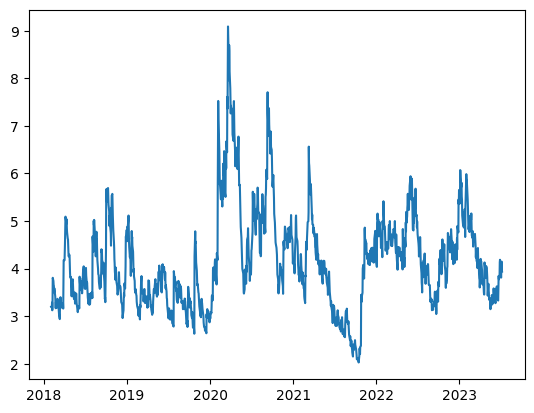

In [ ]:
condvol = model_fit.conditional_volatility
#long run average variance per day
lravd = model_fit.params['omega'] / (1-model_fit.params['alpha[1]']-model_fit.params['beta[1]'])
plt.plot(condvol)
print(lravd)

variance is negative -> something is off. let's try arima-garch model.
idea: training = pre-twitter, test = post-tesla BUT THIS IS FOR FORECAST ONLY

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults

#tsla_twt_returns is test
#tsla_pretwt_returns is train
tsla_returns.index = pd.DatetimeIndex(tsla_returns.index).to_period('D')

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_val, d_val, q_val):
    aic_val = 99999999
    best_p = -1
    best_d = -1
    best_q = -1
    for p in range(0, p_val+1):
        for d in range(0, d_val+1):
            for q in range(0, d_val+1):
                model = ARIMA(dataset, order = (p, d, q))
                model_fit = model.fit()

                if model_fit.aic < aic_val:
                  aic_val = model_fit.aic
                  best_p = p
                  best_d = d
                  best_q = q
                else:
                  break
    return aic_val, best_p, best_d, best_q


ljung box pierce q test

In [ ]:
param = evaluate_models(tsla_returns, 5, 5, 5)
print(param)

(7741.784350458539, 0, 0, 0)


In [ ]:
tick = pdr.DataReader('TSLA',  start=datetime.datetime(2018, 2, 1),
                          end=datetime.datetime(2023, 7, 8))
log_returns = (np.log(tick['Adj Close']) - np.log(tick['Adj Close'].shift(1))).dropna()
log_returns.index = pd.DatetimeIndex(log_returns.index).to_period('D')

param2 = evaluate_models(log_returns, 5, 5, 5)
param3 = evaluate_models(100*log_returns, 5, 5, 5)
print(param2)
print(param3)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(-4833.886826495635, 0, 0, 0)
(7738.227721788271, 0, 0, 0)


In [ ]:
arima_tsla = ARIMA(tsla_returns, order=(0,0,0))
at_fit = arima_tsla.fit()
# summary of fit model
print(at_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(at_fit.resid)

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1365
Model:                          ARIMA   Log Likelihood               -3868.892
Date:                Mon, 17 Jul 2023   AIC                           7741.784
Time:                        13:04:08   BIC                           7752.222
Sample:                    02-02-2018   HQIC                          7745.691
                         - 07-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2655      0.112      2.376      0.018       0.046       0.485
sigma2        16.9595      0.400     42.394      0.000      16.175      17.744
Ljung-Box (L1) (Q):                   0.48   Jarque-

In [ ]:
means = ['Constant', 'Zero', 'AR']
dist = ['normal','t','skewt']
vol = ['GARCH', 'EGARCH']

ag_params = garch_table(3, 3, 3, means, dist, vol, residuals)
print(ag_params)

(7468.8632531042995, 1, 1, 0, 'Constant', 't', 'EGARCH')


In [ ]:
ag_model = arch_model(residuals, mean='Constant', vol='EGARCH', dist='t', p=1, q=1)
model_fit = ag_model.fit(disp="off")
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - EGARCH Model Results                        
====================================================================================
Dep. Variable:                            0   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -3729.43
Distribution:      Standardized Student's t   AIC:                           7468.86
Method:                  Maximum Likelihood   BIC:                           7494.96
                                              No. Observations:                 1365
Date:                      Mon, Jul 17 2023   Df Residuals:                     1364
Time:                              13:07:24   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0213  8.501e-02     -0.250      0.802 [ -0.188,  0.145]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0801  3.971e-02      2.017  4.366e-02 [2.278e-03,  0.158]
alpha[1]       0.1594  4.065e-02      3.922  8.777e-05 [7.976e-02,  0.239]
beta[1]        0.9768  1.290e-02     75.702      0.000   [  0.952,  1.002]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.0321      0.452      8.918  4.733e-19 [  3.146,  4.918]
========================================================================

Covariance estimator: robust
"""

In [ ]:
condvol = model_fit.conditional_volatility
#long run average variance per day
lravd = model_fit.params['omega'] / (1-model_fit.params['alpha[1]']-model_fit.params['beta[1]'])
#pd.plotting.register_matplotlib_converters()
#plt.plot(condvol)
print(lravd)

-0.5879540644876107


https://www.fnspace.com/Community/CommunityView?rno=140

I DONT GET IT WHY LRAVD KEEP GETTING TO Z

In [ ]:
output = model_fit.forecast(steps=24*7)

print(output)

1366    1.139607
1367    0.876171
1368    1.034432
1369    0.309031
1370    0.197453
          ...   
1529    0.511520
1530    0.511520
1531    0.511520
1532    0.511520
1533    0.511520
Name: predicted_mean, Length: 168, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


https://doheon.github.io/%EC%84%B1%EB%8A%A5%EB%B9%84%EA%B5%90/time-series/ci-6.compare-post/

https://core.ac.uk/download/pdf/234626643.pdf

https://www.linkedin.com/pulse/taming-market-beast-predicting-volatility-garch-models-dfi-labs

https://colab.research.google.com/drive/1zSlcnL3I-bix8vWEIl6YCYLs6nedClIA?usp=sharing#scrollTo=JnlRWjKhhPbq

https://chat.openai.com/share/de598373-19b3-4abf-92da-8448fbda46f1
